<a href="https://colab.research.google.com/github/SuhasiniTatipalli/Heart-Failure-Prediction/blob/main/Project2_Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Source: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [169]:
# Import libraies, Mount Drive, Load Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report,plot_confusion_matrix,ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [170]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project 2/HeartFailure_Dataset.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Prepare/clean the data for exploratory analysis purposes.

In [171]:
#Make a copy of the original df
df_h = df.copy()
df_h.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [172]:
#Check for duplicates
df_h.duplicated().sum()

0

Check for missing values. 

In [173]:
#check for nulls
df_h.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [174]:
#Ensure data types match the data types listed in the data dictionary
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [175]:
#Describe data
df_h.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [176]:
df_h['HeartDisease'].value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

Check for and address any inconsistent values in categorical columns.

In [177]:
dtypes = df_h.dtypes
str_Columns = dtypes[dtypes=='object'].index
str_Columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [178]:
for col in str_Columns:
    print(f"Column_Name - {col}")
    print(df_h[col].value_counts(dropna=False))
    print('\n')

Column_Name - Sex
M    725
F    193
Name: Sex, dtype: int64


Column_Name - ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64


Column_Name - RestingECG
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64


Column_Name - ExerciseAngina
N    547
Y    371
Name: ExerciseAngina, dtype: int64


Column_Name - ST_Slope
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64




In [179]:
#Check for and address any impossible values in numeric columns.

df_h['Age'].value_counts()

54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64

In [180]:
dtypes = df_h.dtypes
float_Columns = dtypes[dtypes=='float'].index
float_Columns

Index(['Oldpeak'], dtype='object')

In [181]:
for col in float_Columns:
    print(f"Column_Name - {col}")
    print(df_h[col].value_counts(dropna=False))
    print('\n')

Column_Name - Oldpeak
 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.9      7
 1.3      7
 2.6      7
 1.1      7
 1.7      6
 2.2      5
 0.9      4
 2.4      4
 3.6      4
 3.4      3
 4.2      2
 3.5      2
-0.5      2
 2.3      2
 3.2      2
 2.1      2
-1.0      2
-0.1      2
 5.6      1
 2.9      1
 6.2      1
 3.8      1
-1.5      1
 3.1      1
-2.0      1
 3.7      1
-0.8      1
-0.7      1
-1.1      1
-2.6      1
-0.9      1
 5.0      1
 4.4      1
Name: Oldpeak, dtype: int64




In [182]:
dtypes = df_h.dtypes
int_Columns = dtypes[dtypes=='int'].index
int_Columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'HeartDisease'],
      dtype='object')

In [183]:
for col in int_Columns:
    print(f"Column_Name - {col}")
    print(df_h[col].value_counts(dropna=False))
    print('\n')

Column_Name - Age
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64


Column_Name - RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64


Column_Name - Cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64


Column_Name - FastingBS
0    704
1    214
Name: FastingBS, dtype: int64


Column_Name - MaxHR
150    43
140    41
120    36

Univariate visuals for the target and all features.

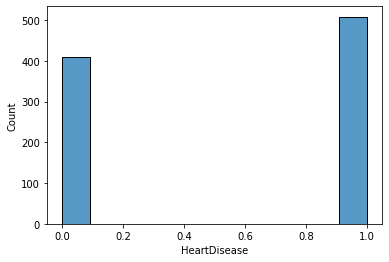

In [184]:
sns.histplot(data=df_h, x='HeartDisease');

The above graph represents a high level overview of patients with heart disease. There are 508 patients diagnosed with heart disease. Let's further breakdown and analyze this chohort.

In [185]:
# filter for heart disease patients and further analysing them
HD = df_h['HeartDisease']==1
HD
H_D=df_h.loc[HD]
H_D

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1


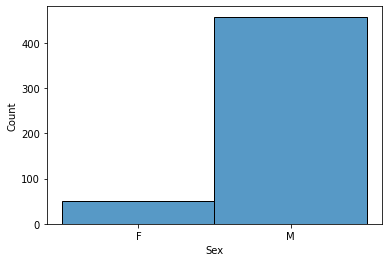

In [186]:
sns.histplot(data=H_D, x='Sex');

Above histogram shows that there are less than 100 females with heart problems and more than 400 males are having heart disease.

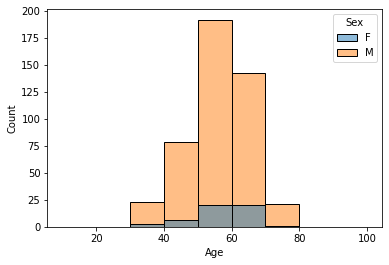

In [187]:
sns.histplot(data=H_D, x='Age',hue = 'Sex',bins=[10,20,30,40,50,60,70,80,90,100]);

Above histogram shows that when compared to female, more male are having heart disease between the age of 30 and 80. 

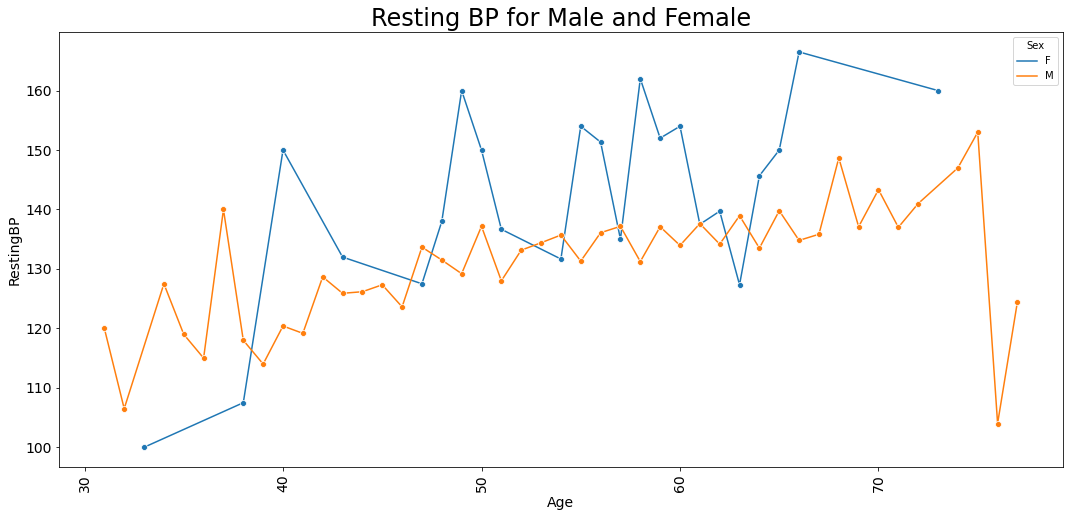

In [188]:
sns.lineplot(data = H_D, x = 'Age', y = 'RestingBP',ci = None, marker = 'o',hue = 'Sex')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(18, 8)
plt.title('Resting BP for Male and Female',fontsize=24)
plt.ylabel('RestingBP',fontsize=14)
plt.xlabel('Age',fontsize=14)
plt.tick_params(axis='both',labelsize=14)

Above lineplot shows the resting BP for male and female from the heart disease cohort. 

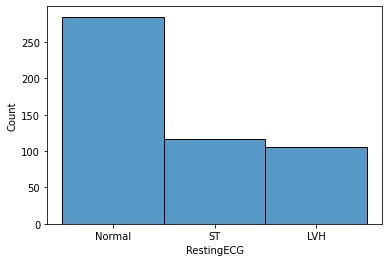

In [189]:
sns.histplot(data=H_D, x='RestingECG');

Resting ECG distribution for the same cohort.

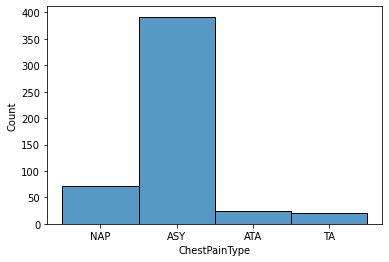

In [190]:
sns.histplot(data=H_D, x='ChestPainType');

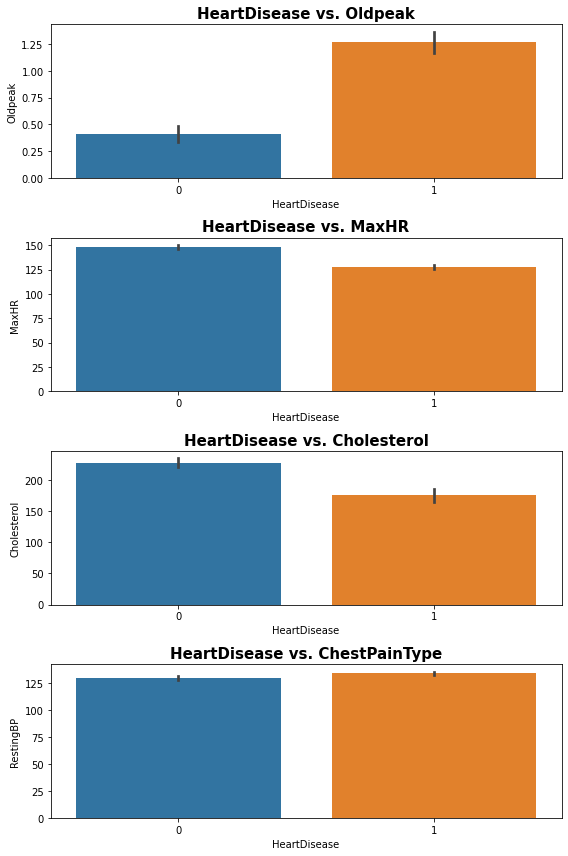

In [191]:
fig, axes = plt.subplots(nrows=4, figsize=(8,12))

sns.barplot(data=df_h, x = 'HeartDisease', y = 'Oldpeak', ax=axes[0])
axes[0].set_title('HeartDisease vs. Oldpeak', fontsize = 15, fontweight = 'bold')

sns.barplot(data=df, x = 'HeartDisease', y = 'MaxHR', ax=axes[1])
axes[1].set_title('HeartDisease vs. MaxHR', fontsize = 15, fontweight = 'bold')
#axes[1].set_xticks([0,1])

sns.barplot(data=df, x = 'HeartDisease', y = 'Cholesterol', ax=axes[2])
axes[2].set_title('HeartDisease vs. Cholesterol', fontsize = 15, fontweight = 'bold')

sns.barplot(data=df, x = 'HeartDisease', y = 'RestingBP', ax=axes[3])
axes[3].set_title('HeartDisease vs. ChestPainType', fontsize = 15, fontweight = 'bold')

fig.tight_layout()

Chest pain type distribution for the same cohort

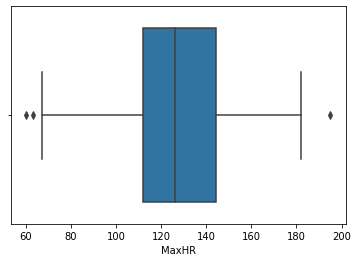

In [192]:
# Boxplot with seaborn
sns.boxplot(data=H_D, x='MaxHR');

The above boxplot shows the outliers for the max heart. 

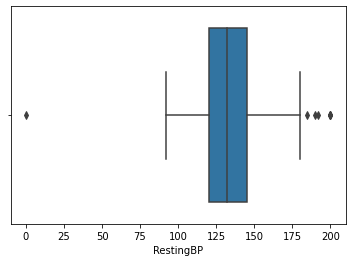

In [193]:
# Boxplot with seaborn
sns.boxplot(data=H_D, x='RestingBP');

The above boxplot shows the outliers for the resting BP.

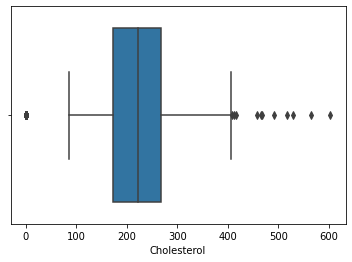

In [194]:
# Boxplot with seaborn
sns.boxplot(data=df_h, x='Cholesterol');

The above boxplot shows the outliers for the cholesterol.

The below pie chart, countplot & PairPlot are sourced from Kaggle.

Identifying any moderate or strong correlations between your target and your features and/or between one feature and another.

In [195]:
def show_corr_heatmap (df, title):
    
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (15, 10))
    plt.title(title)
    sns.heatmap(corr, annot = True, linewidths=.5, square=True, mask = mask)
    plt.show()

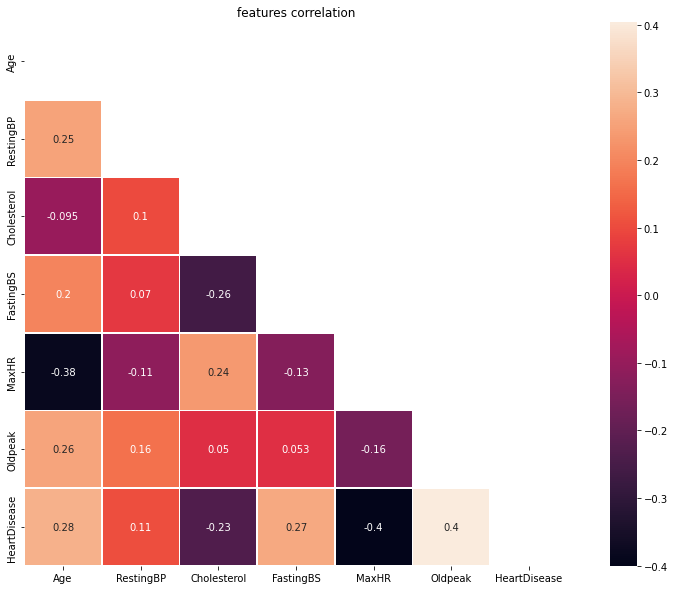

In [196]:
show_corr_heatmap(df_h, "features correlation")

Target vector is 'HeartDisease' and there is a strong corelation between Oldpeak & HeartDisease and Age & HeartDisease

Creating multivariate exploratory visuals to further understand your data.

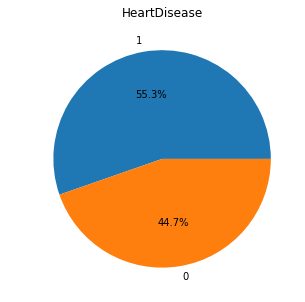

In [197]:
fig = plt.figure(figsize=(5,5))
df_h['HeartDisease'].value_counts().plot(kind = 'pie', autopct='%.1f%%')
plt.ylabel(" ", fontsize = 15)
plt.title("HeartDisease")
print("")

The above Pie chart shows that 44.7% of people with no heart disease and 55.3% with heart disease.

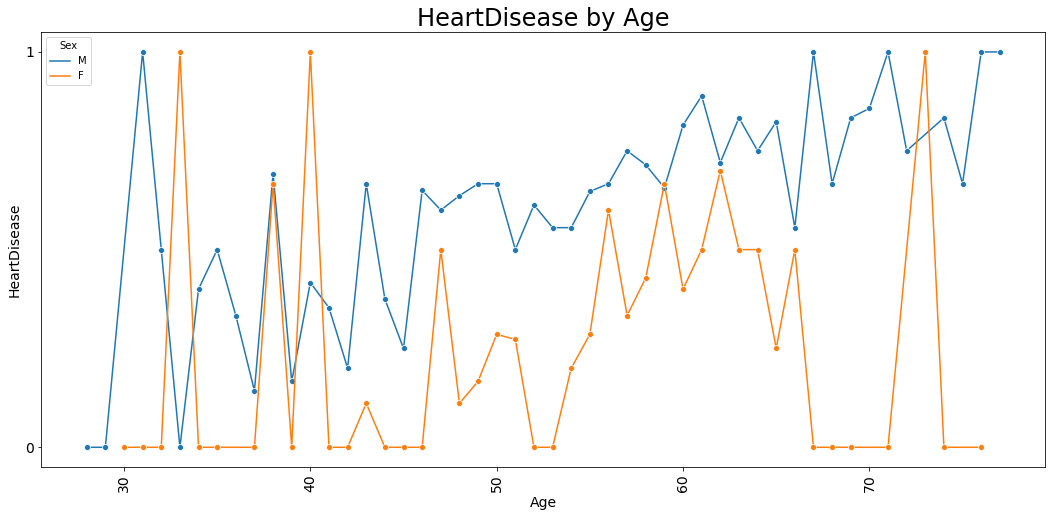

In [198]:
sns.lineplot(data = df_h, x = 'Age', y = 'HeartDisease',ci = None, marker = 'o',hue = 'Sex')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(18, 8)
plt.title('HeartDisease by Age',fontsize=24)
plt.ylabel('HeartDisease',fontsize=14)
plt.xlabel('Age',fontsize=14)
plt.yticks([0,1])
plt.tick_params(axis='both',labelsize=14)

The above graph shows that male & female who are between the age of 30 and 40 are at high cardiovascular risk as well as the age group 65+.

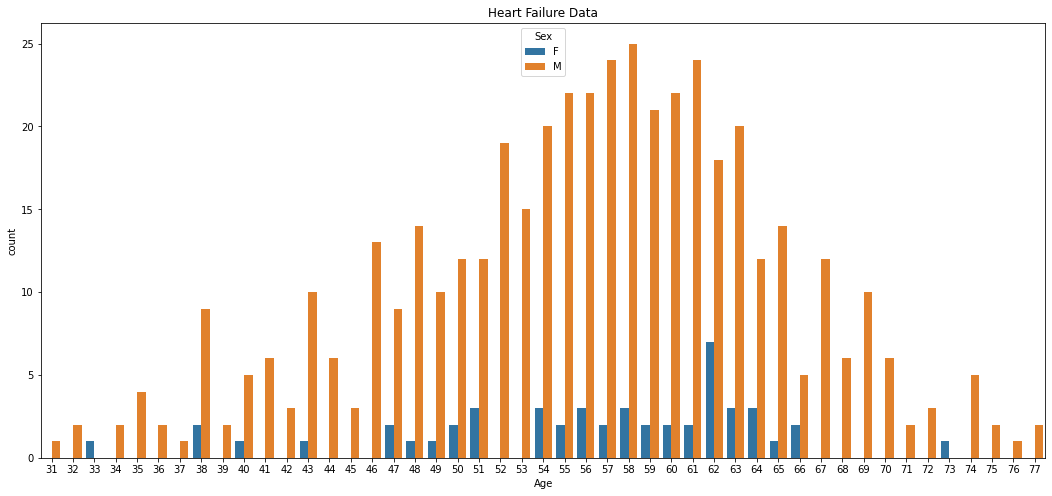

In [199]:
sns.countplot(data=H_D, x = 'Age', hue='Sex').set( title = 'Heart Failure Data')
plt.gcf().set_size_inches(18, 8)
plt.show()

Above graph shows the count of people by age and gender who are at high cardiovascular risk. 

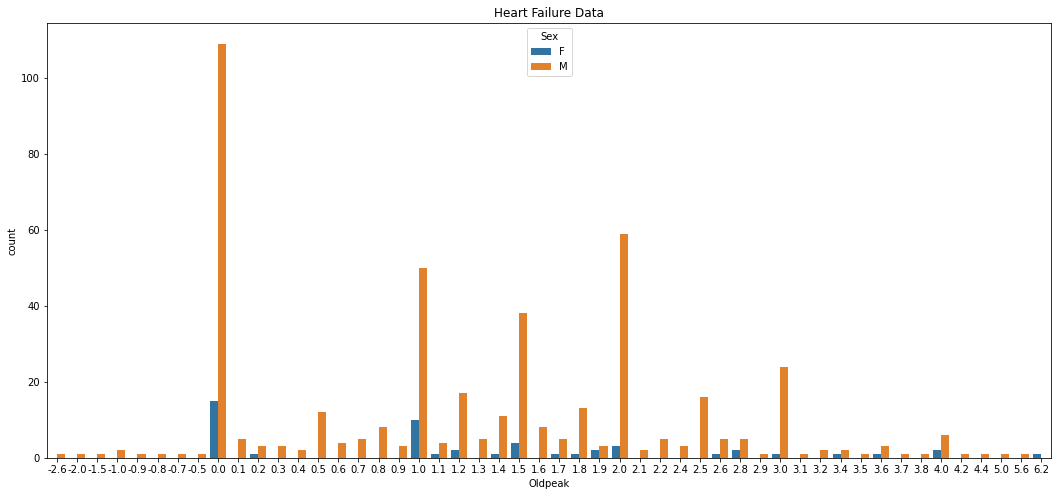

In [200]:
sns.countplot(data=H_D, x = 'Oldpeak',hue='Sex').set( title = 'Heart Failure Data')
plt.gcf().set_size_inches(18, 8)
plt.show()

ST segment depression less than 0.5 mm is accepted in all leads. ST segment depression 0.5 mm or more is considered pathological.

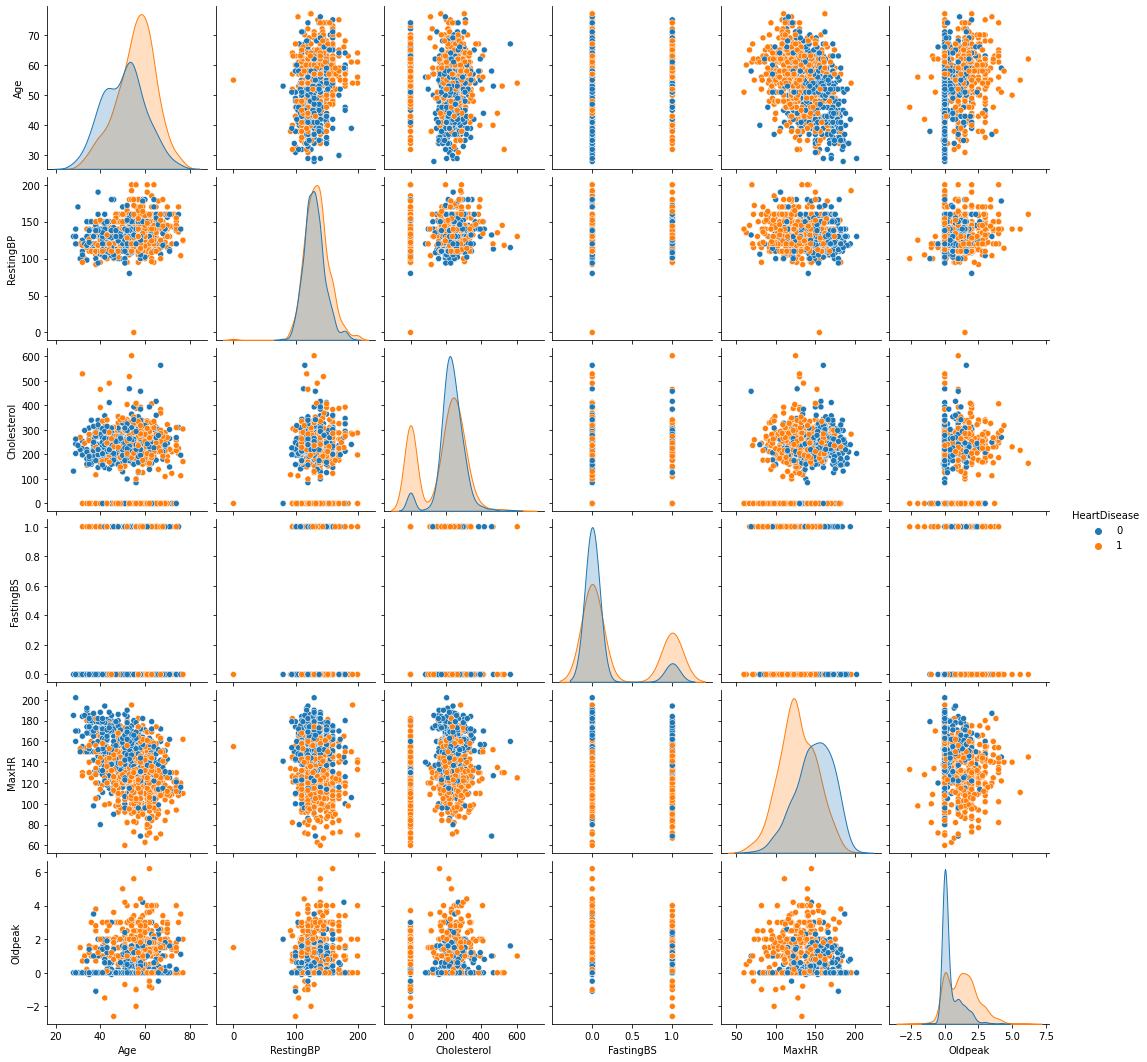

In [201]:
#PairPlot
sns.pairplot(df_h,hue = 'HeartDisease');

Prepare the data appropriately for modeling

In [202]:
#Determine How Balanced the Classes Are
df_h['HeartDisease'].value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

In [203]:
## Arrange Data into a Features Matrix and Target Vector
y = df_h['HeartDisease']
X = df_h.drop(columns = 'HeartDisease')
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
155,56,M,ASY,155,342,1,Normal,150,Y,3.0,Flat
362,56,M,NAP,155,0,0,ST,99,N,0.0,Flat
869,59,M,NAP,150,212,1,Normal,157,N,1.6,Up
101,51,M,ASY,130,179,0,Normal,100,N,0.0,Up
199,57,F,TA,130,308,0,Normal,98,N,1.0,Flat
...,...,...,...,...,...,...,...,...,...,...,...
106,48,F,ASY,120,254,0,ST,110,N,0.0,Up
270,45,M,ASY,120,225,0,Normal,140,N,0.0,Up
860,60,M,ASY,130,253,0,Normal,144,Y,1.4,Up
435,60,M,ASY,152,0,0,ST,118,Y,0.0,Up


In [204]:
#instantiate the StandardScaler, OneHotEncoder, OrdinalEncoder and Imputers
# Scaler
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [205]:
#a) Create column selectors for the numeric and categorical columns
cat_selector = make_column_selector(dtype_include = 'object')
num_selector = make_column_selector(dtype_include = 'number')

In [206]:
# Numeric pipeline
numeric_pipe = make_pipeline(scaler)
# Categorical pipeline
categorical_pipe = make_pipeline(ohe)

In [207]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

In [208]:
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fbbab0b5b90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fbbabb5ed90>)])

In [209]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fbbab0b5b90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fbbabb5ed90>)])

LogisticRegression model

In [210]:
# Create a model pipeline with the preprocessor and a LogisticRegression model
log_reg = LogisticRegression()
log_pipe = make_pipeline(preprocessor, log_reg)
log_pipe.fit(X_train, y_train)
train_preds = log_pipe.predict(X_train)
test_preds = log_pipe.predict(X_test)
test_preds[:5]

array([0, 0, 1, 1, 0])

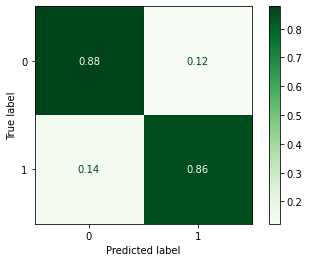

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        98
           1       0.90      0.86      0.88       132

    accuracy                           0.87       230
   macro avg       0.86      0.87      0.86       230
weighted avg       0.87      0.87      0.87       230



In [211]:
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, normalize='true', cmap='Greens')
plt.show()
# Print a classification report
print(classification_report(y_test, test_preds))

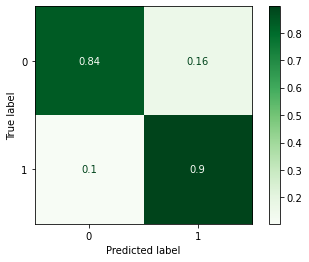

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       312
           1       0.87      0.90      0.88       376

    accuracy                           0.87       688
   macro avg       0.87      0.87      0.87       688
weighted avg       0.87      0.87      0.87       688



In [212]:
ConfusionMatrixDisplay.from_predictions(y_train, train_preds, normalize='true', cmap='Greens')
plt.show()
# Print a classification report
print(classification_report(y_train, train_preds))

In [213]:
# Get the model probability predictions for the test set
test_probs = log_pipe.predict_proba(X_test)
test_probs[:5]

array([[0.97781596, 0.02218404],
       [0.83858417, 0.16141583],
       [0.02455917, 0.97544083],
       [0.02080206, 0.97919794],
       [0.96148774, 0.03851226]])

In [214]:
def convert_probs_to_preds(probabilities, threshold, pos_class=1):
  """Converts float value probabilities into int value predictions.
  If the probability of class 1 is greater than the threshold, the prediction is 1
  Otherwise the prediction is 0
  pos_class determines the index of the positive class in the array of probabilies"""
  predictions = [1 if prob[pos_class] > threshold else 0 for prob in probabilities]
  return predictions

In [215]:
# Create an array of float values between 0 and 1 with a step size of .05
thresholds = np.arange(start=0, stop=1.05, step=.05)
# Create empty recall and precision lists
recalls = []
precisions = []
accuracies = []
# Iterate over thresholds
for thresh in thresholds:
  # Convert probabilities to predictions according to each threshold
  preds = convert_probs_to_preds(test_probs, thresh)
  # Record the recall and precision for predictions at that threshold
  recalls.append(recall_score(y_test, preds))
  precisions.append(precision_score(y_test, preds))
  accuracies.append(accuracy_score(y_test, preds))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


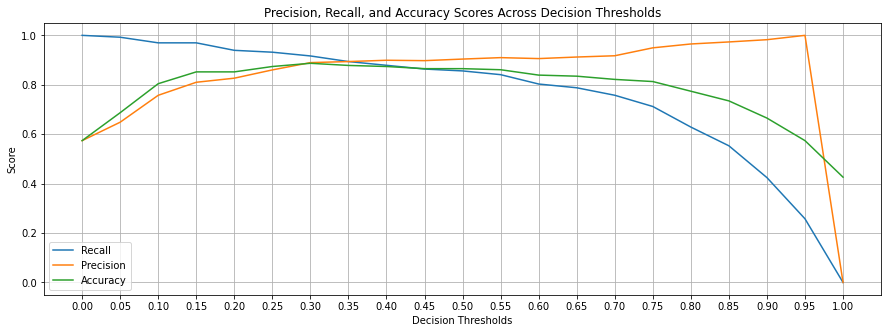

In [216]:
# Plot precisions and recalls for each probability
plt.figure(figsize=(15,5))
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, accuracies, label='Accuracy')
plt.legend()
plt.title('Precision, Recall, and Accuracy Scores Across Decision Thresholds')
plt.xlabel('Decision Thresholds')
plt.ylabel('Score')
plt.grid()
plt.xticks(thresholds)
plt.show()

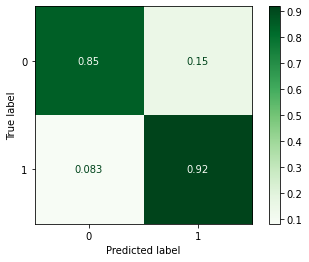

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        98
           1       0.89      0.92      0.90       132

    accuracy                           0.89       230
   macro avg       0.89      0.88      0.88       230
weighted avg       0.89      0.89      0.89       230



In [217]:
# Convert probabilites to class labels with a decision threshold of 0.3
test_preds1 = convert_probs_to_preds(test_probs, .3)
# Display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, test_preds1, normalize='true',
                                        cmap='Greens')
plt.show()
# Print a classification report
print(classification_report(y_test, test_preds1))

Those results are pretty good at 0.3 decision threshold, but let's see if we can improve the test score by changing the value of C.

L1 Tuning

In [218]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores1 = []
test_scores1 = []

#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores1.append(log_reg_pipe.score(X_train, y_train))
  test_scores1.append(log_reg_pipe.score(X_test, y_test))

{0.0001: 0.4260869565217391,
 0.001: 0.4260869565217391,
 0.01: 0.717391304347826,
 0.1: 0.8608695652173913,
 1: 0.8652173913043478,
 10: 0.8608695652173913,
 100: 0.8608695652173913,
 1000: 0.8608695652173913}

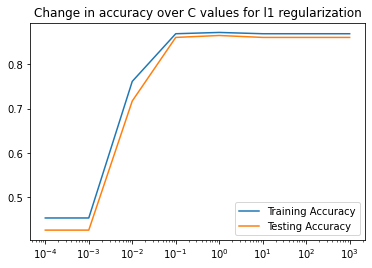

In [219]:
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores1, label='Training Accuracy')
ax.plot(c_values, test_scores1, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores1)}

According to this graph we get the best accuracy on the test set when C=1

L2 Tuning

In [220]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores2 = []
test_scores2 = []

#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores2.append(log_reg_pipe.score(X_train, y_train))
  test_scores2.append(log_reg_pipe.score(X_test, y_test))

{0.0001: 0.8434782608695652,
 0.001: 0.8434782608695652,
 0.01: 0.8608695652173913,
 0.1: 0.8739130434782608,
 1: 0.8652173913043478,
 10: 0.8608695652173913,
 100: 0.8608695652173913,
 1000: 0.8608695652173913}

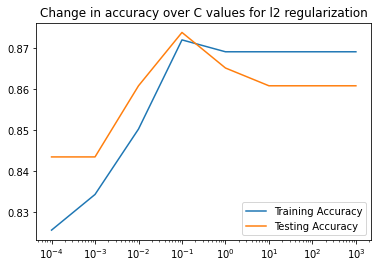

In [221]:
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores2, label='Training Accuracy')
ax.plot(c_values, test_scores2, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores2)}

L2 regularization we get our best score at C=0.1

In [222]:
# Instantiate best models for l2 tuning
logreg_l2 = LogisticRegression(C = 1, solver = 'liblinear', penalty = 'l2')
logreg_pipe_l2 = make_pipeline(preprocessor, logreg_l2)
logreg_pipe_l2.fit(X_train, y_train)

#save predictions
train_l2_preds = logreg_pipe_l2.predict(X_train)
test_l2_preds = logreg_pipe_l2.predict(X_test)

# Check the scores (accuracy)
print(logreg_pipe_l2.score(X_train, y_train))
print(logreg_pipe_l2.score(X_test, y_test))

0.8691860465116279
0.8652173913043478


In [223]:
print('Classification Report for LogisticRegression Test Set')

LR_test_report = classification_report(y_test, test_l2_preds)
print(LR_test_report)

Classification Report for LogisticRegression Test Set
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        98
           1       0.90      0.86      0.88       132

    accuracy                           0.87       230
   macro avg       0.86      0.87      0.86       230
weighted avg       0.87      0.87      0.87       230



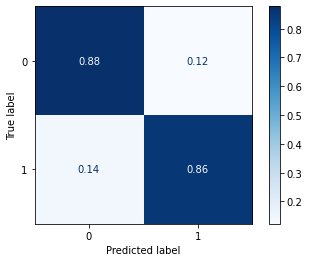

In [224]:
# Plot the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, test_l2_preds,
                                        cmap='Blues',
                                        normalize='true');

the results are better with the change in decision threshold when compared to L1 & L2 tuning. 

KNN Model

In [225]:
# make and fit a pipe

knn_pipe = make_pipeline(preprocessor, KNeighborsClassifier())
knn_pipe.fit(X_train, y_train)

# Predict 
train_preds = knn_pipe.predict(X_train)
test_preds = knn_pipe.predict(X_test)

test_preds[:5]


array([0, 1, 1, 1, 0])

In [226]:
# Check the scores (accuracy)
print(knn_pipe.score(X_train, y_train))
print(knn_pipe.score(X_test, y_test))

0.8793604651162791
0.8826086956521739


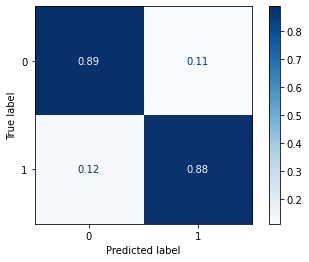

In [227]:
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
                                        cmap='Blues',
                                        normalize='true');

In [228]:
# Classification Report
print(classification_report(y_test, test_preds))
knn_report = classification_report(y_test, test_preds)

              precision    recall  f1-score   support

           0       0.84      0.89      0.87        98
           1       0.91      0.88      0.90       132

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230



In [229]:
# Get the model probability predictions for the test set
test_probs2 = knn_pipe.predict_proba(X_test)
test_probs2[:5]


array([[1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [0.8, 0.2]])

In [230]:
# Create an array of float values between 0 and 1 with a step size of .05
thresholds1 = np.arange(start=0, stop=1.05, step=.05)
# Create empty recall and precision lists
recalls = []
precisions = []
accuracies = []
# Iterate over thresholds
for thresh in thresholds1:
  # Convert probabilities to predictions according to each threshold
  preds = convert_probs_to_preds(test_probs2, thresh)
  # Record the recall and precision for predictions at that threshold
  recalls.append(recall_score(y_test, preds))
  precisions.append(precision_score(y_test, preds))
  accuracies.append(accuracy_score(y_test, preds))


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


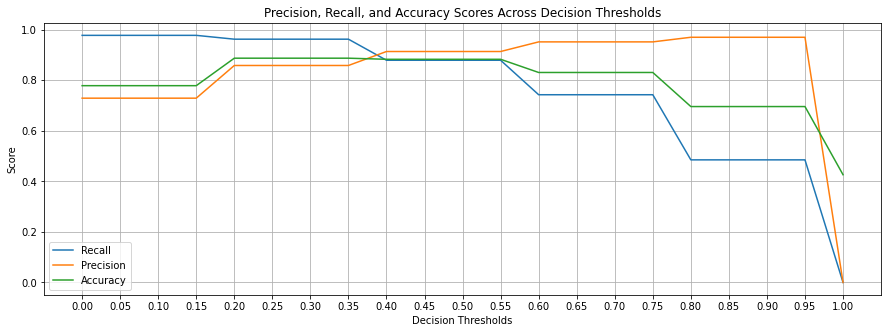

In [231]:
# Plot precisions and recalls for each probability
plt.figure(figsize=(15,5))
plt.plot(thresholds1, recalls, label='Recall')
plt.plot(thresholds1, precisions, label='Precision')
plt.plot(thresholds1, accuracies, label='Accuracy')
plt.legend()
plt.title('Precision, Recall, and Accuracy Scores Across Decision Thresholds')
plt.xlabel('Decision Thresholds')
plt.ylabel('Score')
plt.grid()
plt.xticks(thresholds1)
plt.show()


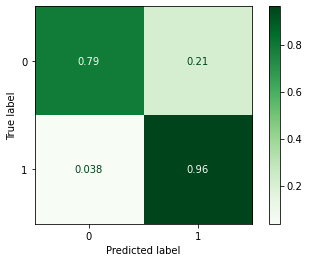

              precision    recall  f1-score   support

           0       0.94      0.79      0.86        98
           1       0.86      0.96      0.91       132

    accuracy                           0.89       230
   macro avg       0.90      0.87      0.88       230
weighted avg       0.89      0.89      0.89       230



In [232]:
# Convert probabilites to class labels with a decision threshold of 0.3
test_preds2 = convert_probs_to_preds(test_probs2, .3)
# Display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, test_preds2, normalize='true',
                                        cmap='Greens')
plt.show()
# Print a classification report
print(classification_report(y_test, test_preds2))


KNN with decision threshold of 0.3 gave the best results so far but let's check other models and tune with hyperparameters.

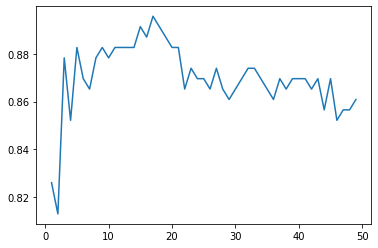

Best K value is 17 
with 0.8956521739130435 accuracy on the test set


In [233]:
krange = range(1, 50)
test_accuracies = []
bestacc = 0
bestk = 0
for k in krange:
  #find accuracy for each k
  pipe = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=k))
  pipe.fit(X_train, y_train)
  acc = accuracy_score(y_test, pipe.predict(X_test))
  #if accuracy for this k is better than previous accuracies, set bestk = k
  if acc > bestacc:
    bestacc = acc
    bestk = k

  test_accuracies.append(acc)

#plot accuracies over K
plt.plot(krange, test_accuracies, label='Test K Scores')
plt.show()

#print best k and best accuracy
print(f'Best K value is {bestk} \nwith {bestacc} accuracy on the test set')

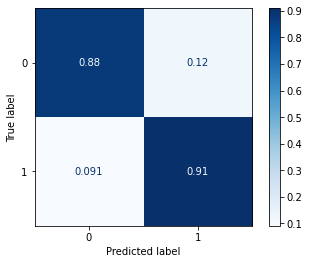

In [234]:
knn_final_pipe = make_pipeline(preprocessor, 
                               KNeighborsClassifier(n_neighbors = bestk))
knn_final_pipe.fit(X_train, y_train)

# Predict 
knn_train_preds = knn_final_pipe.predict(X_train)
knn_test_preds = knn_final_pipe.predict(X_test)

# Display confusion matrix for KNN with best k
ConfusionMatrixDisplay.from_predictions(y_test, knn_test_preds,
                                        cmap='Blues',
                                        normalize='true');

In [235]:
# Classification Report
print('Classification report for best KNN Model:')

print(classification_report(y_test, knn_test_preds))
knn_report = classification_report(y_test, knn_test_preds)

Classification report for best KNN Model:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        98
           1       0.91      0.91      0.91       132

    accuracy                           0.90       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.90      0.90      0.90       230



After Hyperparameter Tuning the KNN model the accuracy increased to 90%. Let's try to tune with GridSearchCV.

GridSearchCV With KNN Pipeline 

In [236]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fbbab0b5b90>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fbbabb5ed90>)])),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers

In [237]:
pipe_param_grid = {'kneighborsclassifier__n_neighbors': range(1,10),
              'kneighborsclassifier__p': range(1,5),
              'kneighborsclassifier__weights': ['distance','uniform']}

In [238]:
knn_pipe_gs = GridSearchCV(knn_pipe, pipe_param_grid)

knn_pipe_gs.fit(X_train, y_train)
print('Best KNN GS Parameters:')
print(knn_pipe_gs.best_params_)
#retrieve the best version of the model
best_pipe = knn_pipe_gs.best_estimator_
#refit the model on the whole training set
best_pipe.fit(X_train, y_train)
#save predictions
best_preds = best_pipe.predict(X_test)
#score the model on the test set
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test, y_test)}')

Best KNN GS Parameters:
{'kneighborsclassifier__n_neighbors': 9, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'distance'}
Accuracy of best KNN model is: 0.8913043478260869


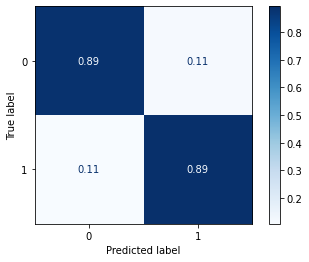

In [239]:
# Display confusion matrix for KNN with best k
ConfusionMatrixDisplay.from_predictions(y_test, best_preds,
                                        cmap='Blues',
                                        normalize='true');

The reults are not impressive.

Adaboost

Classification report for Adaboost:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        98
           1       0.91      0.82      0.86       132

    accuracy                           0.85       230
   macro avg       0.85      0.85      0.85       230
weighted avg       0.85      0.85      0.85       230



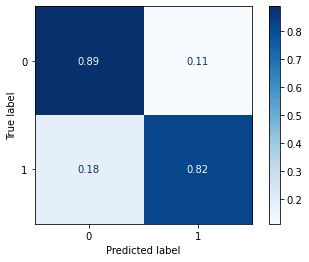

In [240]:
ada_pipe = make_pipeline(preprocessor, AdaBoostClassifier())
ada_pipe.fit(X_train, y_train)
ada_test = ada_pipe.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, ada_test,
                                        cmap='Blues',
                                        normalize='true');
                                        # Classification Report
print('Classification report for Adaboost:')

print(classification_report(y_test, ada_test))
knn_report = classification_report(y_test, ada_test)

In [241]:
ada_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fbbab0b5b90>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fbbabb5ed90>)])),
  ('adaboostclassifier', AdaBoostClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('

In [242]:
ada_param_grid = {'adaboostclassifier__n_estimators': range(50,200),
              'adaboostclassifier__learning_rate': range(1,2,3),
              'adaboostclassifier__random_state': [1]}
           

Best Parameters: {'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__n_estimators': 61, 'adaboostclassifier__random_state': 1}
Accuracy of best Adaboost model is: 0.8434782608695652


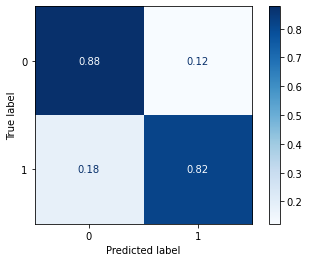

In [243]:
#Tuning the model 

ada_gs = GridSearchCV(ada_pipe,ada_param_grid)

#Fitting gradient search
ada_gs.fit(X_train, y_train)

#The best parameters
print('Best Parameters:',ada_gs.best_params_)

#Using the best estimator
best_ada = ada_gs.best_estimator_

#refit the mode
best_ada.fit(X_train,y_train)

#The predicted data
best_ada_ytrain_pred = best_ada.predict(X_train)
best_ada_ytest_pred = best_ada.predict(X_test)

#score the model on the test set
print(f'Accuracy of best Adaboost model is: {best_ada.score(X_test, y_test)}')


# Display confusion matrix for KNN with best k
ConfusionMatrixDisplay.from_predictions(y_test, best_ada_ytest_pred,
                                        cmap='Blues',
                                        normalize='true');


XGBoost

Classification report for Adaboost:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        98
           1       0.92      0.85      0.88       132

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



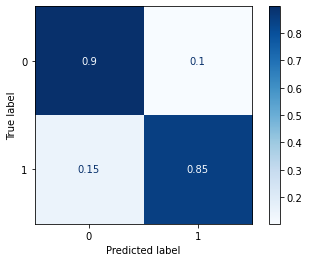

In [244]:
xgb_pipe = make_pipeline(preprocessor, XGBClassifier())
xgb_pipe.fit(X_train, y_train)
#test_data = pd.read-csv
XG_test = xgb_pipe.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, XG_test,
                                        cmap='Blues',
                                        normalize='true');
                                        # Classification Report
print('Classification report for Adaboost:')

print(classification_report(y_test, XG_test))
knn_report = classification_report(y_test, XG_test)

In [245]:
xgb_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fbbab0b5b90>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fbbabb5ed90>)])),
  ('xgbclassifier', XGBClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('pipeline-1

In [246]:
xgb_param_grid = {'xgbclassifier__n_estimators': range(50,100,200),
              'xgbclassifier__max_depth': range(3,10,20),
              'xgbclassifier__random_state': [1]}

Best Parameters: {'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__random_state': 1}
Accuracy of best Adaboost model is: 0.8695652173913043


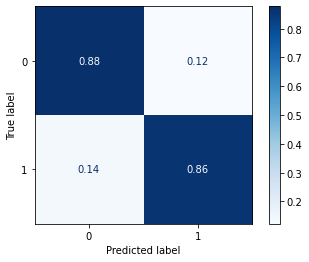

In [247]:
#Tuning the model 

xgb_gs = GridSearchCV(xgb_pipe,xgb_param_grid)

#Fitting gradient search
xgb_gs.fit(X_train, y_train)

#The best parameters
print('Best Parameters:',xgb_gs.best_params_)

#Using the best estimator
best_xgb = xgb_gs.best_estimator_

#refit the mode
best_xgb.fit(X_train,y_train)

#The predicted data
best_xgb_ytrain_pred = best_xgb.predict(X_train)
best_xgb_ytest_pred = best_xgb.predict(X_test)

#score the model on the test set
print(f'Accuracy of best Adaboost model is: {best_xgb.score(X_test, y_test)}')


# Display confusion matrix for KNN with best k
ConfusionMatrixDisplay.from_predictions(y_test, best_xgb_ytest_pred,
                                        cmap='Blues',
                                        normalize='true');

Final conclusion:

After evaluation various model performances, the best perfoming model  here is KNN & LogisticRegression model. 
In this project my target is to decrease FN and make it equals to zero.
Based on the best perfoming models as shown below, I will use the KNN model with a decision threshold of 0.3 as the final model with accuracy of 89% and false negative count went down to 5 and which is lower than all other models. 

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        98
           1       0.91      0.91      0.91       132

    accuracy                           0.90       230
   macro avg       0.89      0.89      0.89       230
weighted avg       0.90      0.90      0.90       230



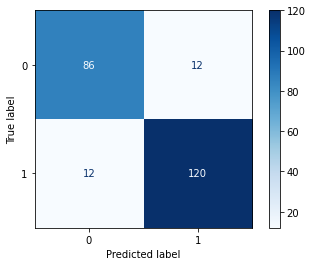

In [248]:
#Best KNN model performance report
print(classification_report(y_test, knn_test_preds))

# Display confusion matrix for KNN with best k
ConfusionMatrixDisplay.from_predictions(y_test, knn_test_preds,
                                        cmap='Blues'
                                      );

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        98
           1       0.89      0.92      0.90       132

    accuracy                           0.89       230
   macro avg       0.89      0.88      0.88       230
weighted avg       0.89      0.89      0.89       230



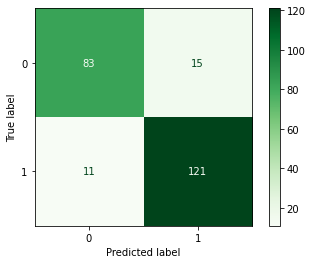

In [249]:
# Best LogisticRegression model performance report 
print(classification_report(y_test, test_preds1))

# Display confusion matrix for LogisticRegression with a best decision threshold of 0.3
ConfusionMatrixDisplay.from_predictions(y_test, test_preds1, 
                                        cmap='Greens')

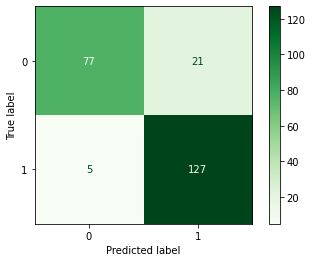

              precision    recall  f1-score   support

           0       0.94      0.79      0.86        98
           1       0.86      0.96      0.91       132

    accuracy                           0.89       230
   macro avg       0.90      0.87      0.88       230
weighted avg       0.89      0.89      0.89       230



In [251]:
# Convert probabilites to class labels with a decision threshold of 0.3
test_preds2 = convert_probs_to_preds(test_probs2, .3)
# Display a confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, test_preds2, cmap='Greens')
plt.show()
# Print a classification report
print(classification_report(y_test, test_preds2))